# Imports

In [1]:
from sklearn.datasets import make_classification, make_circles, make_gaussian_quantiles
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Gerando Dados

In [4]:
import numpy as np
X, y = make_gaussian_quantiles(n_samples=1000,n_features=2, n_classes=3, random_state=12, cov=1)


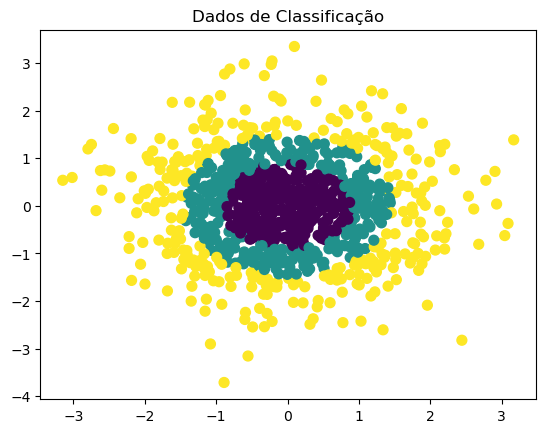

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
plt.title('Dados de Classificação');

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#normalizando os dados
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std
print(f'Tamanho do conjunto de treino: {x_train.shape}')
print(f'Tamanho do conjunto de teste: {x_test.shape}')

Tamanho do conjunto de treino: (800, 2)
Tamanho do conjunto de teste: (200, 2)


# Treinando classificador

Training binary classifiers: 100%|██████████| 3/3 [00:00<00:00,  3.32it/s, Par=1 vs 2]


Acurácia de treino: 0.98
Acurácia de teste: 0.96


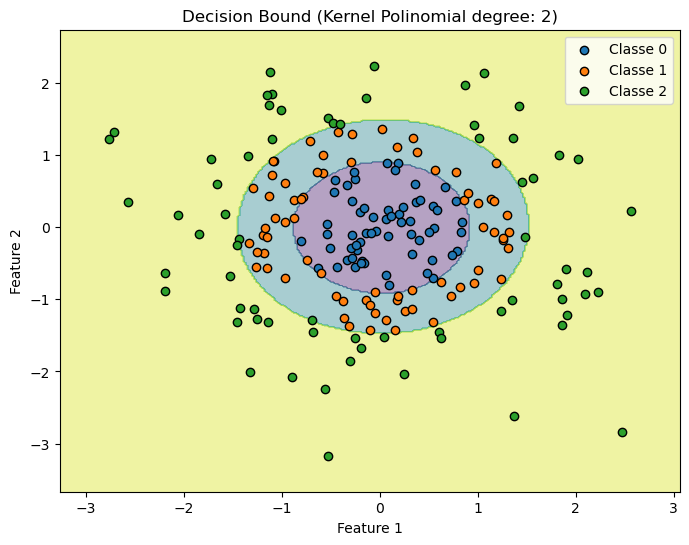

In [11]:
from CLog_MC_OvO import CLog_OVO
from utils import plot_decision_boundary

# Parâmetros do classificador
kernel = 2
model = CLog_OVO(kernel=kernel, step=0.005, n_iter=2000, batch_size=64, iterative=False,mode='dual')
# Treinamento
model.fit(x_train, y_train)

# Avaliação
y_pred = model.predict(x_train)
# Avaliação
accuracy = accuracy_score(y_train, y_pred)
print(f'Acurácia de treino: {accuracy:.2f}')


# Previsões
y_pred = model.predict(x_test)
# Avaliação
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia de teste: {accuracy:.2f}')
# Plotando os dados de teste e as previsões
plot_decision_boundary(model, x_test, y_test, resolution=300)

In [12]:
import importlib
import CLog_MC_Ecoc
#importlib.reload(CLogDKPd_MGmB)
importlib.reload(CLog_MC_Ecoc)


<module 'CLog_MC_Ecoc' from 'C:\\Users\\Fabiano\\Documents\\Projeto-OML\\CLog_MC_Ecoc.py'>

Será gerado output codes de tamanho 3 bits para dados com 3 classes diferentes e canônicas.
Gerando modelo para bit #1 do output code...
Gerando modelo para bit #2 do output code...
Gerando modelo para bit #3 do output code...
Acurácia de treino: 0.67
Acurácia de teste: 0.64


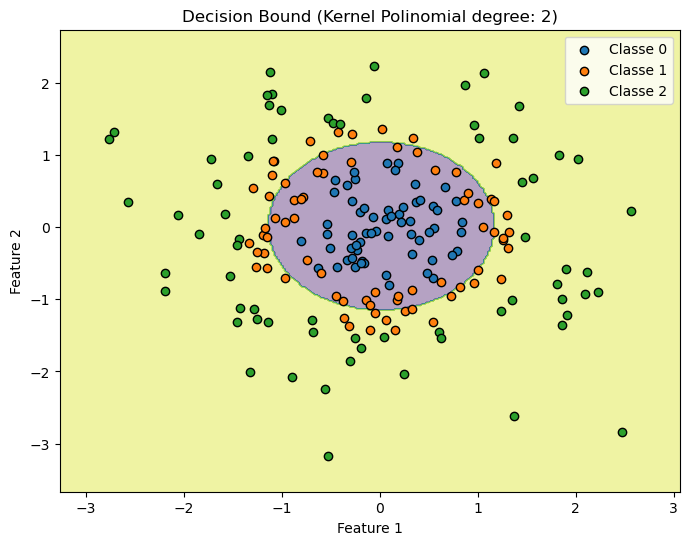

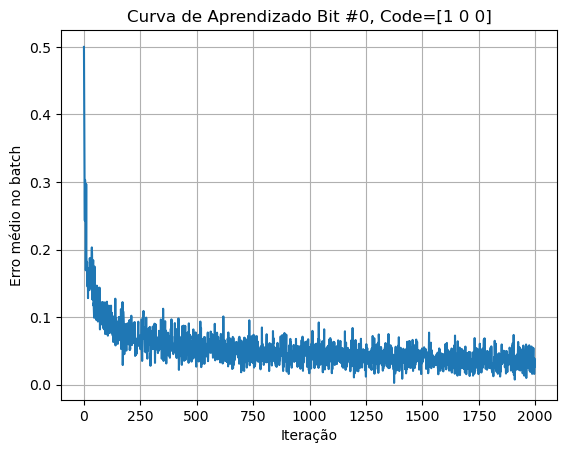

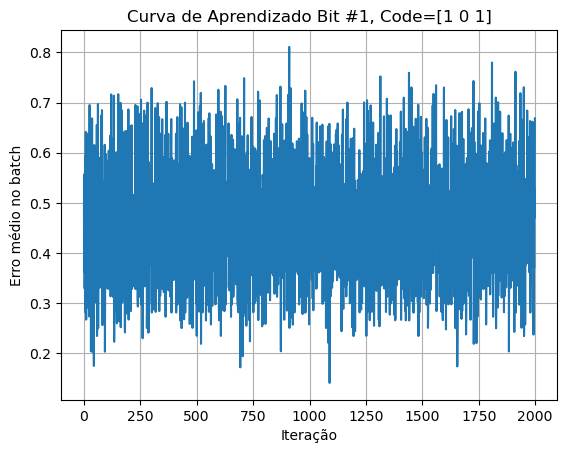

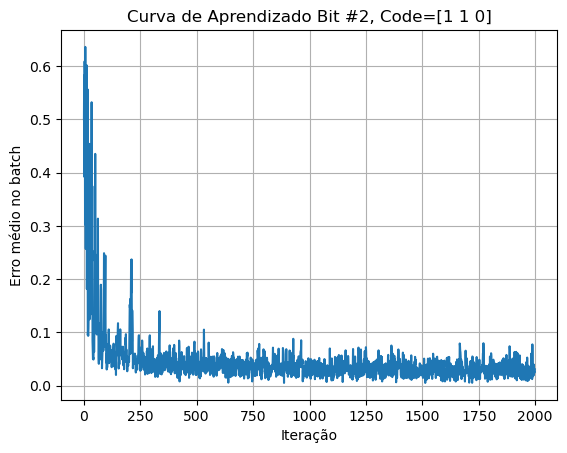

In [58]:
import CLog_MC_Ecoc
import CLogDKPd_MGmB
from CLog_MC_Ecoc import CLog_Ecoc
from utils import plot_decision_boundary

# Parâmetros do classificador
kernel = 2
model = CLog_Ecoc(kernel=kernel, step=0.005, n_iter=2000, batch_size=64, iterative=False,mode='dual') 
# Treinamento
model.fit(x_train, y_train)

# Avaliação
y_pred = model.predict(x_train)
# Avaliação
accuracy = accuracy_score(y_train, y_pred)
print(f'Acurácia de treino: {accuracy:.2f}')


# Previsões
y_pred = model.predict(x_test)
# Avaliação
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia de teste: {accuracy:.2f}')

if True:
    # Plotando os dados de teste e as previsões
    plot_decision_boundary(model, x_test, y_test, resolution=300)

    for i, errors in enumerate(model.get_errors()):
        # Plot da curva de aprendizado
        plt.figure()
        plt.plot(errors)
        plt.title(f"Curva de Aprendizado Bit #{i}, Code={model.codes[:,i]}")
        plt.xlabel("Iteração")
        plt.ylabel("Erro médio no batch")
        plt.grid(True)
        plt.show()

In [16]:
model.codes

array([[1, 1, 1],
       [0, 0, 1],
       [0, 1, 0]])

Será gerado output codes de tamanho 2 bits para dados com 3 classes diferentes e canônicas.
Gerando modelo para bit #1 do output code...
Gerando modelo para bit #2 do output code...
Acurácia de treino: 0.99
Acurácia de teste: 0.98


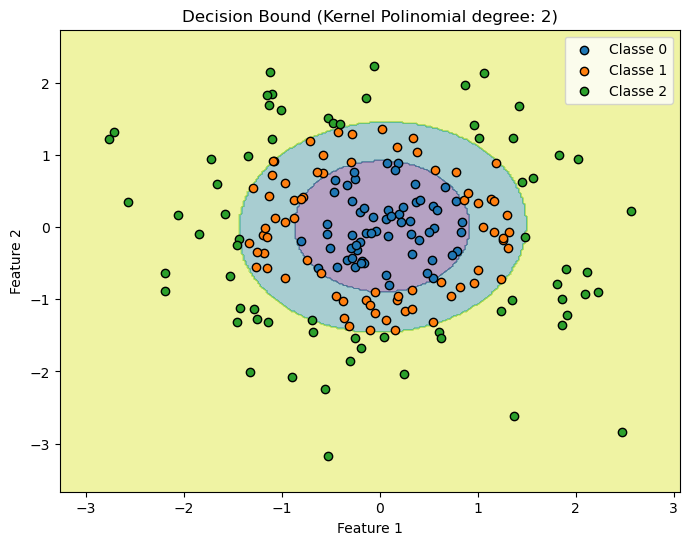

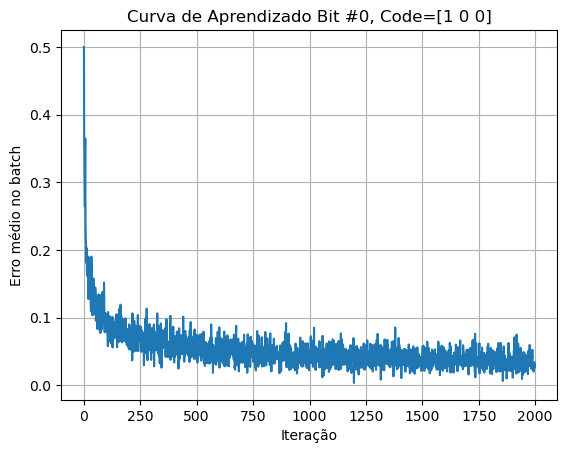

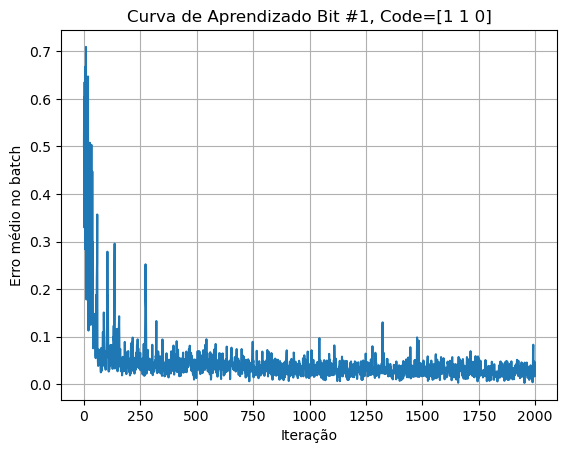

In [49]:
# Parâmetros do classificador
kernel = 2
model = CLog_Ecoc(kernel=kernel, step=0.005, n_iter=2000, batch_size=64, iterative=False,mode='dual') 
# Treinamento
model.fit(x_train, y_train, ECOCTable = [[1, 1], [0, 1],[0, 0]])

# Avaliação
y_pred = model.predict(x_train)
# Avaliação
accuracy = accuracy_score(y_train, y_pred)
print(f'Acurácia de treino: {accuracy:.2f}')


# Previsões
y_pred = model.predict(x_test)
# Avaliação
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia de teste: {accuracy:.2f}')

if True:
    # Plotando os dados de teste e as previsões
    plot_decision_boundary(model, x_test, y_test, resolution=300)

    for i, errors in enumerate(model.get_errors()):
        # Plot da curva de aprendizado
        plt.figure()
        plt.plot(errors)
        plt.title(f"Curva de Aprendizado Bit #{i}, Code={model.codes[:,i]}")
        plt.xlabel("Iteração")
        plt.ylabel("Erro médio no batch")
        plt.grid(True)
        plt.show()

In [28]:
from sklearn.multiclass import OutputCodeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification, make_blobs
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from utils import plot_decision_boundary
import numpy as np


clf = OutputCodeClassifier(
    estimator=MLPClassifier(hidden_layer_sizes=(100,), random_state=10, max_iter=2000, early_stopping=True),
    random_state=0).fit(x_train, y_train)

y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print(np.unique(y_pred))
print(np.unique(y_test))
print(f"Accuracy: {accuracy:.2f}")

[0 1 2]
[0 1 2]
Accuracy: 0.53


In [ ]:
a = np.array([
    [1., 1., 1.],
    [-1., -1., 1.],
    [-1., 1., -1.]
])

aa = np.array([
    [ 1.,  1.,  1.],
    [ 1., -1.,  1.],
    [-1.,  1.,  1.]
])

aa = -a

for i in range(1000):
    clf = OutputCodeClassifier(
        estimator=LogisticRegression(dual=False, random_state=10),
        random_state=i, code_size=1).fit(x_train, y_train)
    if(np.array_equal(a, clf.code_book_) or np.array_equal(aa, clf.code_book_)):
        print(i, clf.code_book_)    


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# pipeline com transformação polinomial + regressão logística
poly_logistic = make_pipeline(
    PolynomialFeatures(degree=2),
    LogisticRegression(dual=True, solver='liblinear', random_state=10)
)

# classificador multiclasse com codificação binária
clf = OutputCodeClassifier(
    estimator=poly_logistic,
    random_state=77,
    code_size=1
)

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
plot_decision_boundary(clf, x_test, y_test, resolution=300)
print(np.unique(y_pred))
print(np.unique(y_test))
print(f"Accuracy: {accuracy:.2f}")
print(clf.estimators_)
print(clf.code_book_)